In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = []
        self.val_loss = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        if self.no_bias == False:
            X = np.insert(X, 0, 1, axis=1)
            if X_val is not None and y_val is not None:
                X_val = np.insert(X_val, 0, 1, axis=1)
            
        n_col = X.shape[1] # Xの列数を取得
        self.coef_ =  np.random.rand(n_col) # パラメーターの初期化      
        
        
        for i in range(self.iter):
            error = self._linear_hypothesis(X) - y
            self.coef_ = self._gradient_descent(X, error)      
            self.loss.append(self._loss_f(self._linear_hypothesis(X), y))
            if X_val is not None and y_val is not None:
                self.val_loss.append(self._loss_f(self._linear_hypothesis(X_val), y_val))
        
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print(self.coef_)
        
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.no_bias == False:
            X = np.insert(X, 0, 1, axis=1)
        
        y_pred = self._linear_hypothesis(X)
        
        return y_pred 
    
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
        y : 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        y = np.dot(X, self.coef_.T)
        
        return y
    
    
    def _gradient_descent(self, X, error):
        """
        最急降下法により学習させる

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 誤差

        Returns
        -------        
        theta : 次の形のndarray, shape (n_features,)
          パラメータ        
        """
        m = X.shape[0]
        theta = self.coef_ - self.lr*np.dot(error, X)/m

        return  theta

    
    def _loss_f(self, y_pred, y):
        """
        目的関数を計算する

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        -------
        m : float
          目的関数の値

        """
        m = y.shape[0]
        loss = (y_pred-y).T@(y_pred-y)/(2*m)
        
        return loss    
    

# 【問題1】仮定関数

# $h_\theta(x) = \theta^T \cdot x.$

## 仮定関数の実装
```python 
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
    y : 次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    y = np.dot(X, self.coef_.T)

    return y
```

# 【問題2】最急降下法

## $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$

## gradient descent の実装
```python 
def _gradient_descent(self, X, error):
    """
    最急降下法により学習させる

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    error : 誤差

    Returns
    -------        
    theta : 次の形のndarray, shape (n_features,)
      パラメータ        
    """
    m = X.shape[0]
    theta = self.coef_ - self.lr*np.dot(error, X)/m

    return  theta
```

## fit の実装
```python 
def fit(self, X, y, X_val=None, y_val=None):
    """
    線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    X_val : 次の形のndarray, shape (n_samples, n_features)
        検証データの特徴量
    y_val : 次の形のndarray, shape (n_samples, )
        検証データの正解値
    """

    if self.no_bias == False:
        X = np.insert(X, 0, 1, axis=1)
        if X_val is not None and y_val is not None:
            X_val = np.insert(X_val, 0, 1, axis=1)

    n_col = X.shape[1] # Xの列数を取得
    self.coef_ =  np.random.rand(n_col) # パラメーターの初期化      


    for i in range(self.iter):
        error = self._linear_hypothesis(X) - y
        self.coef_ = self._gradient_descent(X, error)      
        self.loss.append(self._loss_f(self._linear_hypothesis(X), y))
        if X_val is not None and y_val is not None:
            self.val_loss.append(self._loss_f(self._linear_hypothesis(X_val), y_val))

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.coef_)
```

# 【問題3】推定

## predict の実装
```python 
def predict(self, X):
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    if self.no_bias == False:
        X = np.insert(X, 0, 1, axis=1)

    y_pred = self._linear_hypothesis(X)

    return y_pred 
```

# 【問題4】平均二乗誤差

## $L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$

## 平均二乗誤差の実装

In [3]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    m=y.shape[0]
    mse = (y_pred-y).T@(y_pred-y)/m
    
    return mse

# 【問題5】目的関数

## $J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$

## 目的関数の実装
```python 
def _loss_f(self, y_pred, y):
    """
    目的関数を計算する

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    -------
    m : float
      目的関数の値

    """
    m = y.shape[0]
    loss = (y_pred-y).T@(y_pred-y)/(2*m)

    return loss    
```

# 【問題6】学習と推定

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_X = df[['GrLivArea','YearBuilt']] # 説明変数の取得
df_y = df['SalePrice'] # 目的変数の取得
df_Xy = pd.concat([df_X, df_y], axis = 1)

In [7]:
#　訓練データと検証データに分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_X.values, df_y.values, test_size = 0.25, random_state = 0) # 訓練データ75%、検証データ25%として分割

In [8]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
slr = ScratchLinearRegression(5000, 0.001, False, False)
slr.fit(X_train_std, y_train, X_val_std, y_val)
y_val_prid = slr.predict(X_val_std)
print(y_val_prid[:30])

[262349.34119288 153780.18979807 126402.16639441 234879.32827315
 137431.11040548  66916.62235284 211470.57361798 129701.99711542
 495322.28827176 172845.72235145 199445.39892185 200302.41315489
 254011.40516781 114431.47922128 112451.07466947 144590.03577119
 240824.13910202 151429.42906637 145548.76446317 150966.95088999
 146334.37188348 147940.75684178 102021.36093096 199572.49231538
 217433.50279437 108296.56159082 214853.9342102   91088.06984958
 234414.51822137 124546.4571205 ]


In [10]:
# 評価
MSE(y_val_prid, y_val)

2728187979.477863

# 【問題7】学習曲線のプロット

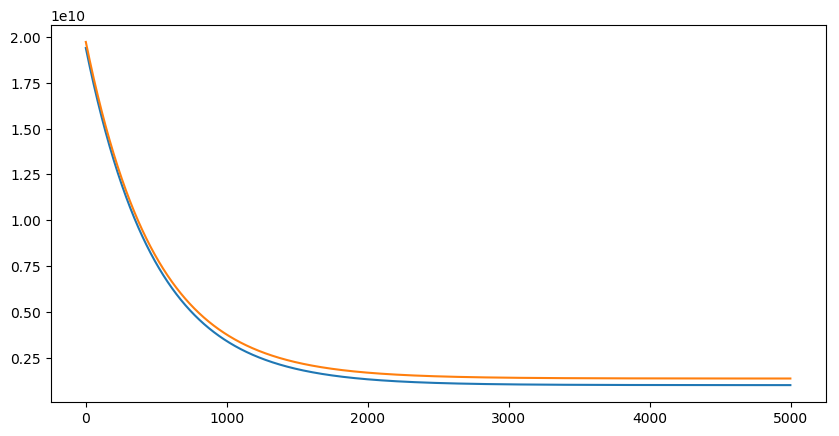

In [11]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(slr.loss)
plt.plot(slr.val_loss)